## Clinical Breast Cancer Diagnosis Procedure
### Initial Detection/Screening:
- Early detection through annual mammography and other breast exams is the best defense against receiving a late-stage breast cancer diagnosis
- Self-examination or clinical breast examination detecting lumps/abnormalities
- Screening mammography recommended for ages 50-74 years with biennial intervals
- Recent updates show expanded age range to 40-74 for screening guidelines

### Diagnostic Imaging:
- Diagnostic mammogram for suspicious areas or abnormal screening results Diagnosing Breast Cancer
- Breast ultrasound using sound waves to make detailed pictures Diagnosing Breast Cancer
- MRI for high-risk patients or complex cases
- Dense breasts present challenges with reduced mammography sensitivity

### Tissue Sampling (Biopsy):
- Biopsy is the only diagnostic procedure that can definitely determine if the suspicious area is cancerous
- Core needle biopsy (CNB) uses a larger hollow needle and is often preferred if breast cancer is suspected Breast Biopsy
- Doctor uses mammogram or ultrasound to find the right place for tissue sample Breast biopsy
- Good news: 80% of women who have a breast biopsy do not have cancer

### Pathological Analysis:
- Tissue sample examined under microscope, with further analysis if cancer is found Need a breast biopsy? 9 things to know
- Pathologist studies cells or tissue to determine if cancer is present Breast Biopsy

### This ML model could assist:
Risk Assessment: Using patient demographics and clinical features

### Key Clinical Integration Points:
This model is to complement, not replace, clinical judgment.

## Problem Statement for Breast Cancer Prediction Project
1. Develop an accurate machine learning model to predict whether a breast tumor is malignant (cancerous) or benign (non-cancerous) based on diagnostic features extracted from medical imaging or clinical data.
2. Given a dataset of breast tumor characteristics (such as cell nucleus features: radius, texture, perimeter, area, smoothness, etc.), classify each case as malignant or benign using Support Vector Machine algorithms while maximizing sensitivity (to avoid missing cancer cases) and maintaining high overall accuracy.
3. 30 featrues are used, examples:
   - radius ( mean of distances from center to points on the perimeter)
   - texture (standard deviation of grey-scale values)
   - perimeter
   - area
   - smoothness (local variation in the radius lengths)
   - compactness (perimeter^2/area - 1.0)
   - concavity (severity of concave portions of the contour)
   - concave points (number of concave portions of the contour)
   - symmetry
   - fractal dimension ('coastline approximation' -1)
4. Datasets are linearly separable using all 30 input features.
5. Number of instances: 569.
6. Classs distribution: 212 Malignant, 357 Benign.
7. Target Class:
  - Malignant
  - Benign

## Importing the data

In [11]:
# let's import the important libraries 
import pandas as pd #for data manipulation
import numpy as np #for statistical analysis
import matplotlib.pyplot as plt #for plotting graph
import seaborn as sns #for statistical visualisation

In [13]:
#we'll load the data from sklearn
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [15]:
#let's view the keys in the dictionary 
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
#we'll print keys one by one, let's start with 'DESCR'
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [19]:
#next, we'll print 'target'
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [21]:
#let's print 'target_name'
print(cancer['target_names'])

['malignant' 'benign']


In [23]:
#let's print 'feature_names'
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [25]:
#let's view the shape of the data 
cancer['data'].shape

(569, 30)

In [27]:
#we'll create dataframe to make our lives easier (our projecr easier)
df_cancer=pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'], ['target']))

In [29]:
#let's check the first 5 rows of the dataframe
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [31]:
#we'll also view the last samples of the dataframe
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [33]:
#let's check for missing values 
df_cancer.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## Visualizing the data

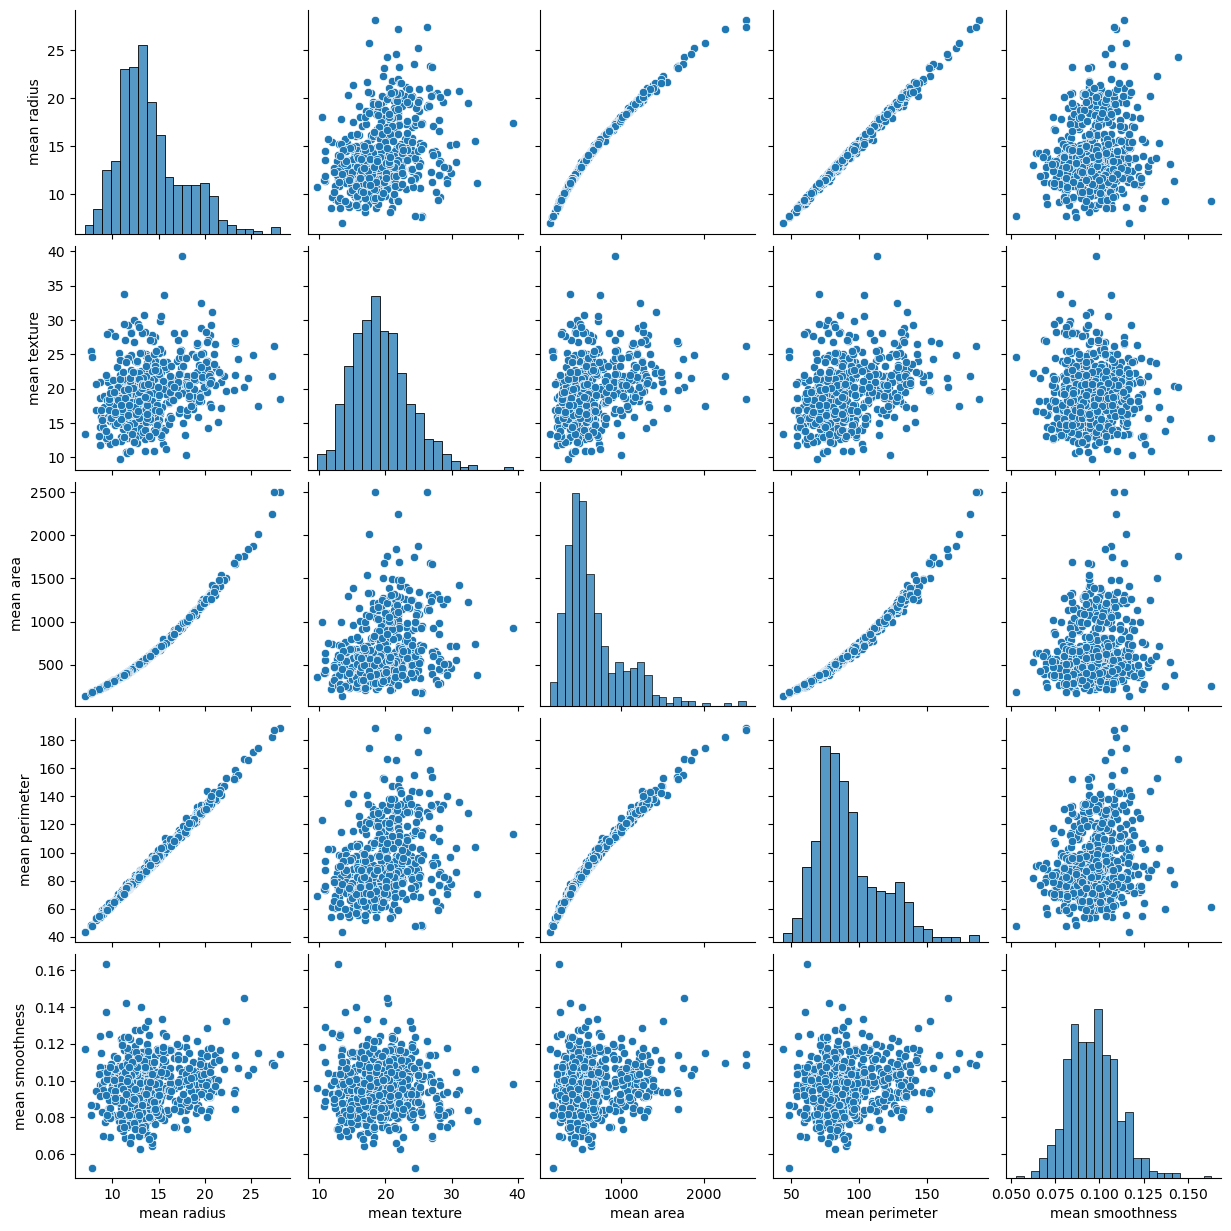

In [39]:
#let's visualize some variables(features) of the data
sns.pairplot(df_cancer, vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

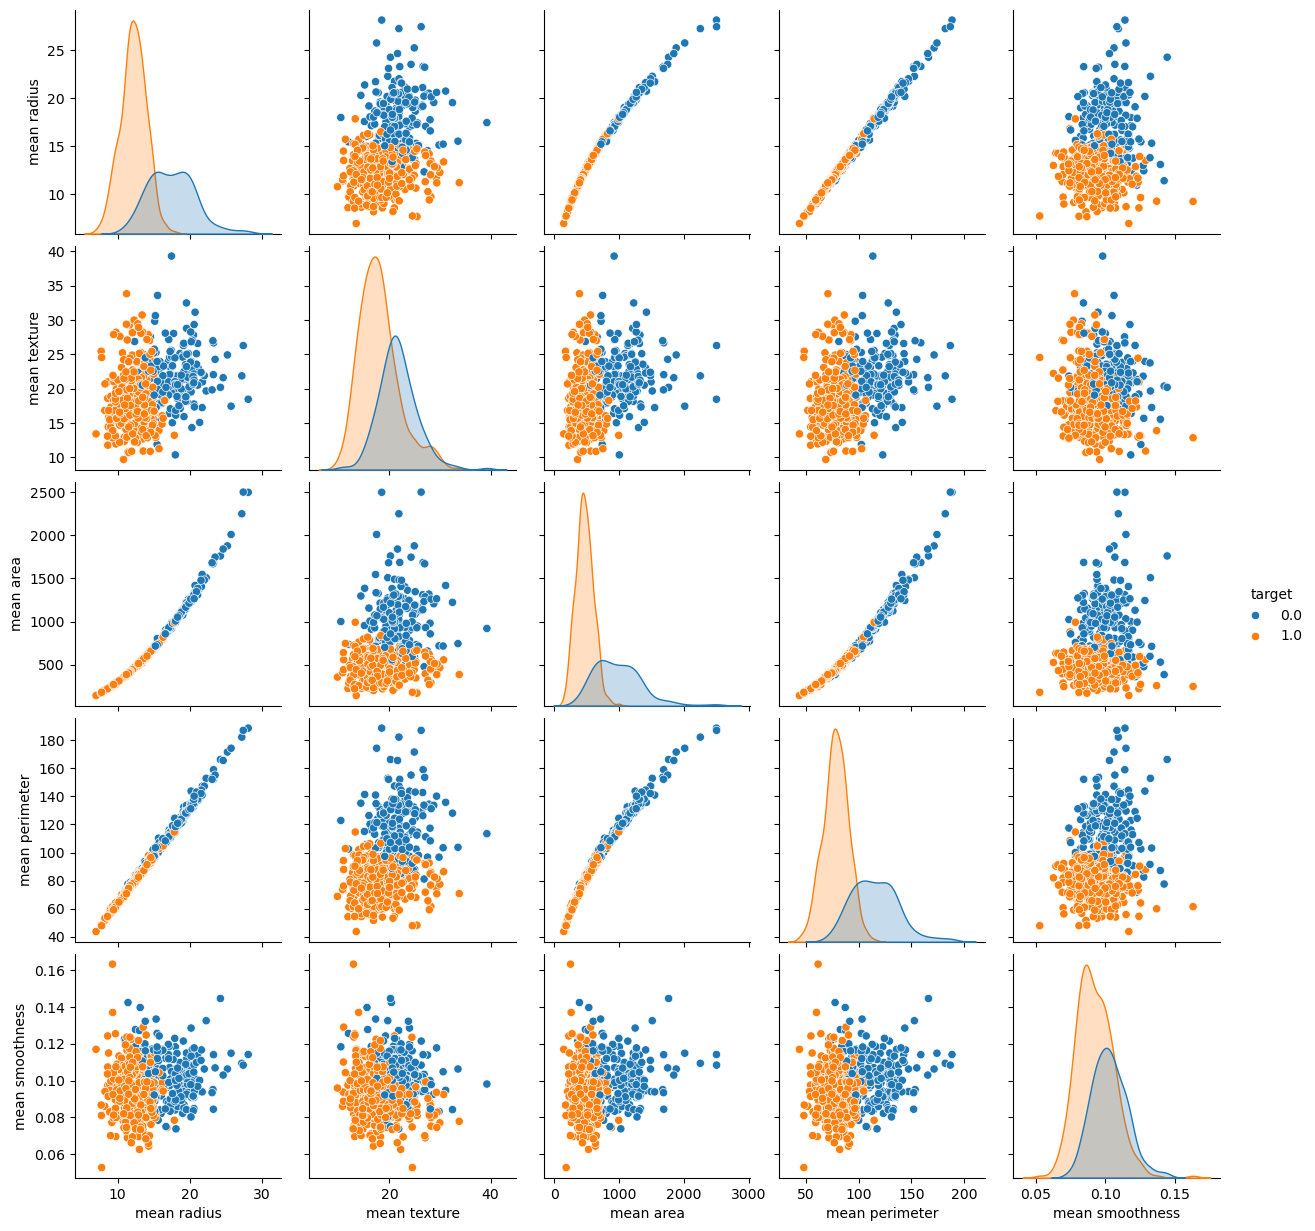

In [41]:
#let's show the target class of the visuals above
sns.pairplot(df_cancer, hue='target', vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

<Axes: xlabel='target', ylabel='count'>

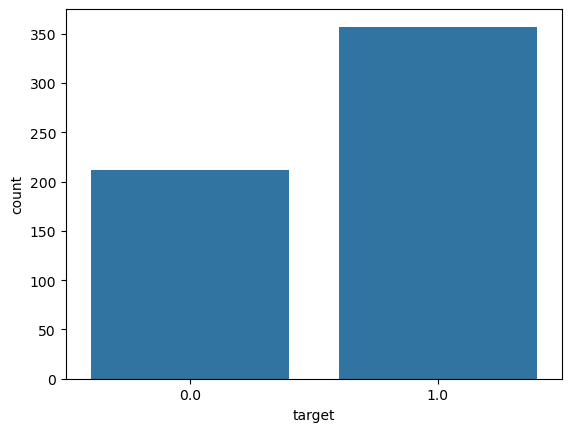

In [43]:
#we'll visualize the target
sns.countplot(x=(df_cancer['target']))

<Axes: xlabel='mean area', ylabel='mean smoothness'>

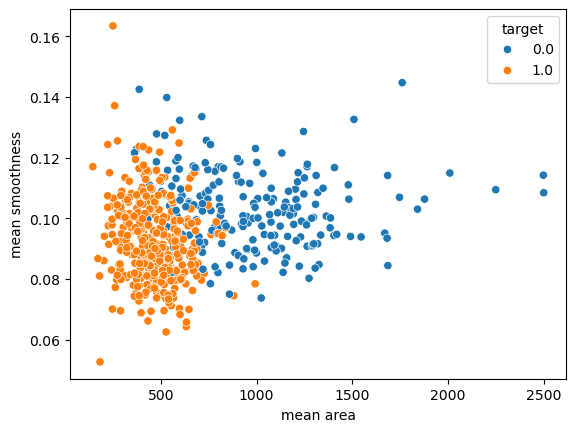

In [45]:
#let's plot the scatter graph
sns.scatterplot(df_cancer, x='mean area', y='mean smoothness', hue='target')

<Axes: >

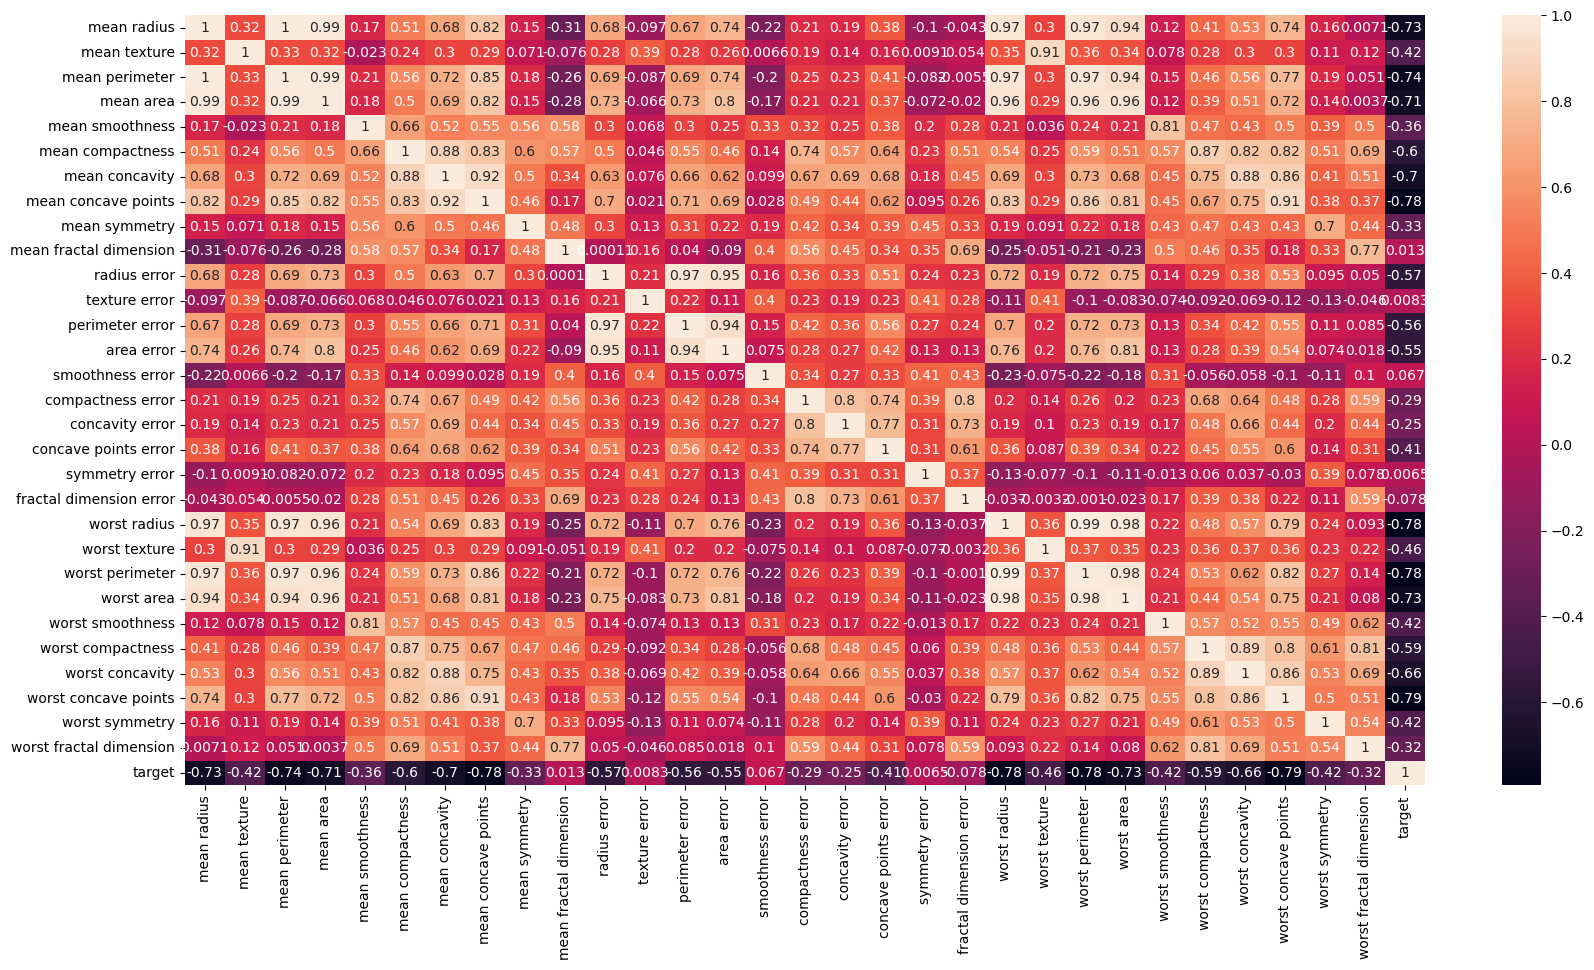

In [47]:
#we'll view the correlations in the dataframe using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(), annot=True)

## Model training

In [50]:
#let's define the imput(X) and output (y)
X=df_cancer.drop(['target'], axis=1)
y=df_cancer['target']

In [52]:
#we'll split the data into training and test datasets, let's import the train_test_split from sklearn library
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=5)

In [56]:
#we'll use SVM to do the classification. first, let's import our model.
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix #for evalution

In [58]:
#let's instantiate an object out of the SVC
model=SVC()
model.fit(X_train, y_train) #fit the training datasets into the model

SVC()

## Evaluating the model

we want to test the model we just trained, and evaluate the model using confusion matrix.

we'll need to understand Type 1 and Type 2 errors, because the consequences of each error type are very different in medical diagnosis.
### Type 1 Error (False Positive):
Predicting cancer when there is actually no cancer. In your model: Predicting Malignant (0) when the actual diagnosis is Benign (1)
- Real-world impact:
    - Patient undergoes unnecessary anxiety and stress
    - Additional unnecessary tests/procedures
    - Increased healthcare costs
    - Potential for unnecessary biopsies or treatments

### Type 2 Error (False Negative):
Predicting no cancer when cancer is actually present. In your model: Predicting Benign (1) when the actual diagnosis is Malignant (0)
- Real-world impact:
    - Missing a cancer diagnosis
    - Delayed treatment leading to disease progression
    - Potentially life-threatening consequences
    - Patient may develop advanced cancer

In [62]:
y_predict=model.predict(X_test)

In [64]:
#we're ploting cconfusion_matrix to show all the correctly classified and misclassified samples
cm=confusion_matrix(y_test, y_predict)

<Axes: >

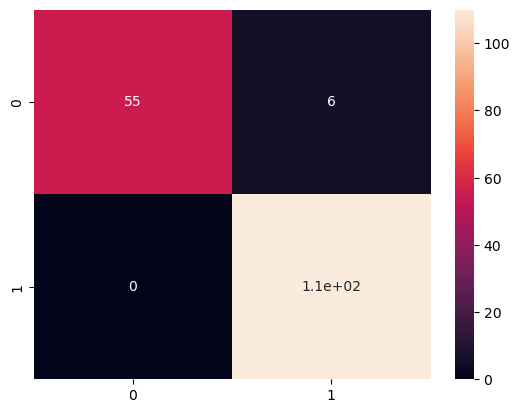

In [66]:
#let's view the cconfusion_matrix
sns.heatmap(cm, annot=True)

- we got 6 misclssified samples of Type 1 errors and 0 misclassified samples of Type 2 errors from our confusion matrix, we need to improve the model.

## Improving the model

- the first step we need to perform is Min-Max Normalization, which scales features to a fixed range, typically 0 to 1.

In [76]:
#let's perform Min-Max Normalization
min_train=X_train.min() #min values of X_train
range_train=(X_train-min_train).max() #obtain the range
X_train_scaled=(X_train-min_train)/range_train #let's do scaling

<Axes: xlabel='mean area', ylabel='mean smoothness'>

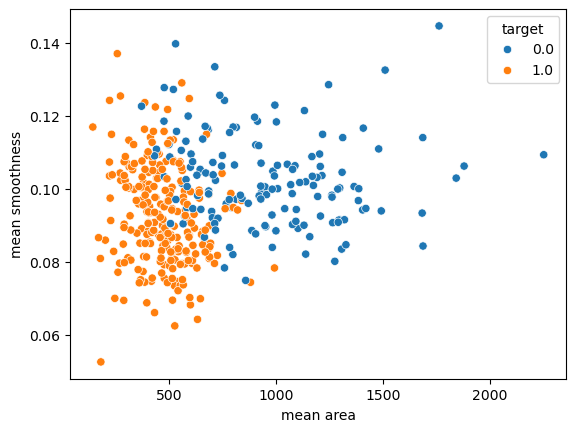

In [78]:
#we'll visualize to make sure the Normalization is effected
sns.scatterplot(x=X_train['mean area'], y=X_train['mean smoothness'], hue=y_train)

- the value of the mean area is range from 500 - 2500, which is unacceptable, we'll run the same command, this time we'll use X_train_scaled.

<Axes: xlabel='mean area', ylabel='mean smoothness'>

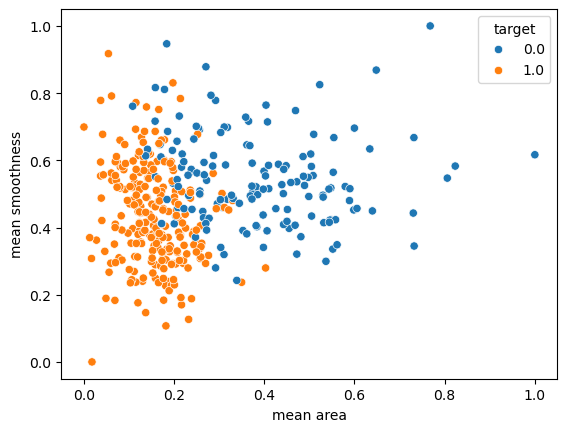

In [81]:
sns.scatterplot(x=X_train_scaled['mean area'], y=X_train_scaled['mean smoothness'], hue=y_train)

In [83]:
#next, we'll perform the same feature scaling of the same Min-Max Normalization, but on the test dataset.
min_test=X_train.min()
range_test=(X_test-min_test).max()
X_test_scaled=(X_test-min_test)/range_test

In [85]:
#let's train the model, instead of training with original data, we'll use the scaled data of the Normalized dataset to train the model.
model.fit(X_train_scaled, y_train)

SVC()

In [87]:
#let's evaluate the new model 
y_predict=model.predict(X_test_scaled)

In [89]:
#we'll use coconfusion_matrix
cm=confusion_matrix(y_test, y_predict) #we'll use the true value

<Axes: >

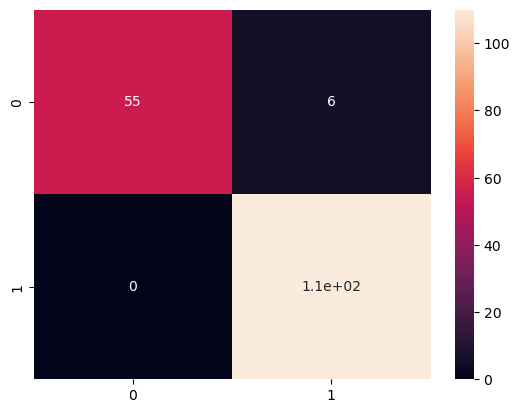

In [91]:
#let's plot our heatmap
sns.heatmap(cm, annot=True)

In [93]:
#the next step is to plot classification_report, that will summarize our performance.
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        61
         1.0       0.95      1.00      0.97       110

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



- the next improvement we'll do to the model, is to optimize our C and Gamma parameters of the SVM. 
??? how can we search for the best values of the best parameters of C and Gamma?

## Hyperparameter Tuning for SVM

1. The first parameter is the C Parameter, which controls trade-off between classifying training points correctly and having a smooth decision boundary.
      - Small C (loose)  makes cost (penalty) of misclassification low (soft margin)
      - Large C (strict) makes cast of missclassification high ( hard margin ), forcing the model to explain input data stricter and potentially overfit.
2. The second parameter, Gamma parameter controls how for the influence of a training set reaches.
   - Large gamma: close reach (closer data points have high weight)
   - Small gamma: far reach (more generalized solution)

In [110]:
#we'll define our range
param_grid={'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel':['rbf']}

In [112]:
#let's import the grid search CV from sklearn
from sklearn.model_selection import GridSearchCV

In [114]:
#we'll run the grid search
grid=GridSearchCV(SVC(), param_grid, refit=True, verbose=4)

In [116]:
#we'll run the fit, simply using X_train_scaled and y_train
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.937 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.613 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [118]:
#we need to get our best values using grid
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [120]:
#we'll use the grid.predict, use the prediction and plot the confusion matrix with the best values of the best parameters that we already had.
grid_predictions=grid.predict(X_test_scaled)

In [122]:
#next, we'll conpute our confusion_matrix
cm=confusion_matrix(y_test, grid_predictions)

<Axes: >

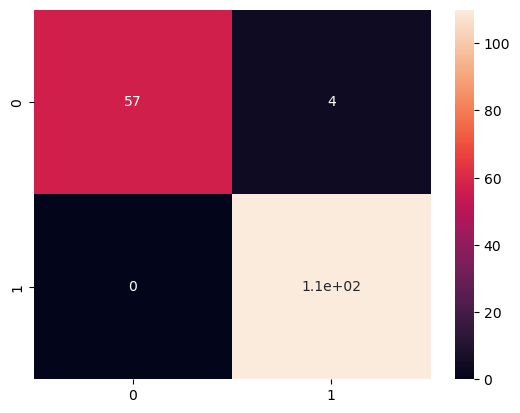

In [124]:
#let's create our heatmap
sns.heatmap(cm, annot=True)

- we found that we only misclassified only 4 points of type 1 errors. which improved from our previous result.

In [127]:
#let's plot the cclassification_report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        61
         1.0       0.96      1.00      0.98       110

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [129]:
#let's save our model and scaler
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the fitted scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(model, f)